**Abstract**

Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. The following data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. 

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.

In [1]:
# Importing the necessary components
import scipy
import openpyxl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Ensuring the notebook's graphs are seaborn standard
sns.set()

In [2]:
# Loading the dataset into a dataframe
df = pd.read_excel('cirrhosis.xlsx')
df.head(10)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


In [3]:
# Checking the shape of dataset
df.shape

(418, 20)

In [4]:
# Checking for null values in the datasets
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [5]:
# Imputing the null values (Replacing the missing or null values with a particular value in the entire dataset)
from sklearn.impute import SimpleImputer

# Imputing the null values with the mode of the column
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns=df.columns
df_imputed

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.6,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.1,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,D-penicillamine,24472,F,N,Y,N,N,1.2,260.0,2.96,52.0,559.0,71.3,118.0,174.0,10.9,3.0
414,415,1103,C,D-penicillamine,14245,F,N,Y,N,N,0.9,260.0,3.83,52.0,559.0,71.3,118.0,180.0,11.2,4.0
415,416,1055,C,D-penicillamine,20819,F,N,Y,N,N,1.6,260.0,3.42,52.0,559.0,71.3,118.0,143.0,9.9,3.0
416,417,691,C,D-penicillamine,21185,F,N,Y,N,N,0.8,260.0,3.75,52.0,559.0,71.3,118.0,269.0,10.4,3.0


In [6]:
# Checking if there are any null values left over after imputing the null values
df_imputed.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [7]:
# Finding the unique values in the columns to make sure no typos exist
for i in df_imputed.columns:
    print(i)
    print()
    # Converting the dataframe object to a list then turning that list into a set
    print(set(df_imputed[i].tolist()))
    print()

ID

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

AxesSubplot(0.125,0.11;0.775x0.77)


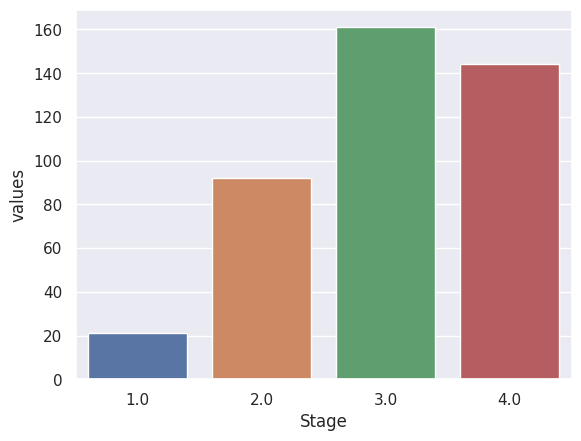

In [8]:
# Checking for label imbalance 
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a temporary dataframe to check how many times a particular value/class has occured
temp=df_imputed["Stage"].value_counts()
temp_df= pd.DataFrame({'Stage': temp.index,'values': temp.values})
print(sns.barplot(x = 'Stage', y="values", data=temp_df))

In [9]:
# Checking the data types of the main dataframe
df.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [10]:
# Printing statistical information about the dataset to make sure the dataset is correct
print(df.describe())

               ID       N_Days           Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000    418.000000  418.000000   284.000000   
mean   209.500000  1917.782297  18533.351675    3.220813   369.510563   
std    120.810458  1104.672992   3815.845055    4.407506   231.944545   
min      1.000000    41.000000   9598.000000    0.300000   120.000000   
25%    105.250000  1092.750000  15644.500000    0.800000   249.500000   
50%    209.500000  1730.000000  18628.000000    1.400000   309.500000   
75%    313.750000  2613.500000  21272.500000    3.400000   400.000000   
max    418.000000  4795.000000  28650.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000  310.000000    312.000000  312.000000     282.000000   
mean     3.497440   97.648387   1982.655769  122.556346     124.702128   
std      0.424972   85.613920   2140.388824   56.699525      65.148639   
min      1.960000    4.000000    289.000000   

In [11]:
# Checking the number of rows with 0 to later correct the dataset if 0s are present
print("Number of rows with 0 values for each variable")
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]

  print(col + ": "+str(missing_rows))

Number of rows with 0 values for each variable
ID: 0
N_Days: 0
Status: 0
Drug: 0
Age: 0
Sex: 0
Ascites: 0
Hepatomegaly: 0
Spiders: 0
Edema: 0
Bilirubin: 0
Cholesterol: 0
Albumin: 0
Copper: 0
Alk_Phos: 0
SGOT: 0
Tryglicerides: 0
Platelets: 0
Prothrombin: 0
Stage: 0


In [12]:
# Labeling encoding to convert categorical values to numerical values since the bare nuclei variable is supposed to be an integer
from sklearn import preprocessing

# Applying preprocessing to the entire dataframe
df=df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df.dtypes

ID               int64
N_Days           int64
Status           int64
Drug             int64
Age              int64
Sex              int64
Ascites          int64
Hepatomegaly     int64
Spiders          int64
Edema            int64
Bilirubin        int64
Cholesterol      int64
Albumin          int64
Copper           int64
Alk_Phos         int64
SGOT             int64
Tryglicerides    int64
Platelets        int64
Prothrombin      int64
Stage            int64
dtype: object

In [13]:
# Saving the preprocessed dataframe as a .csv file
df.to_csv("Cirrhosis_Pre-Processed.csv")

<AxesSubplot: >

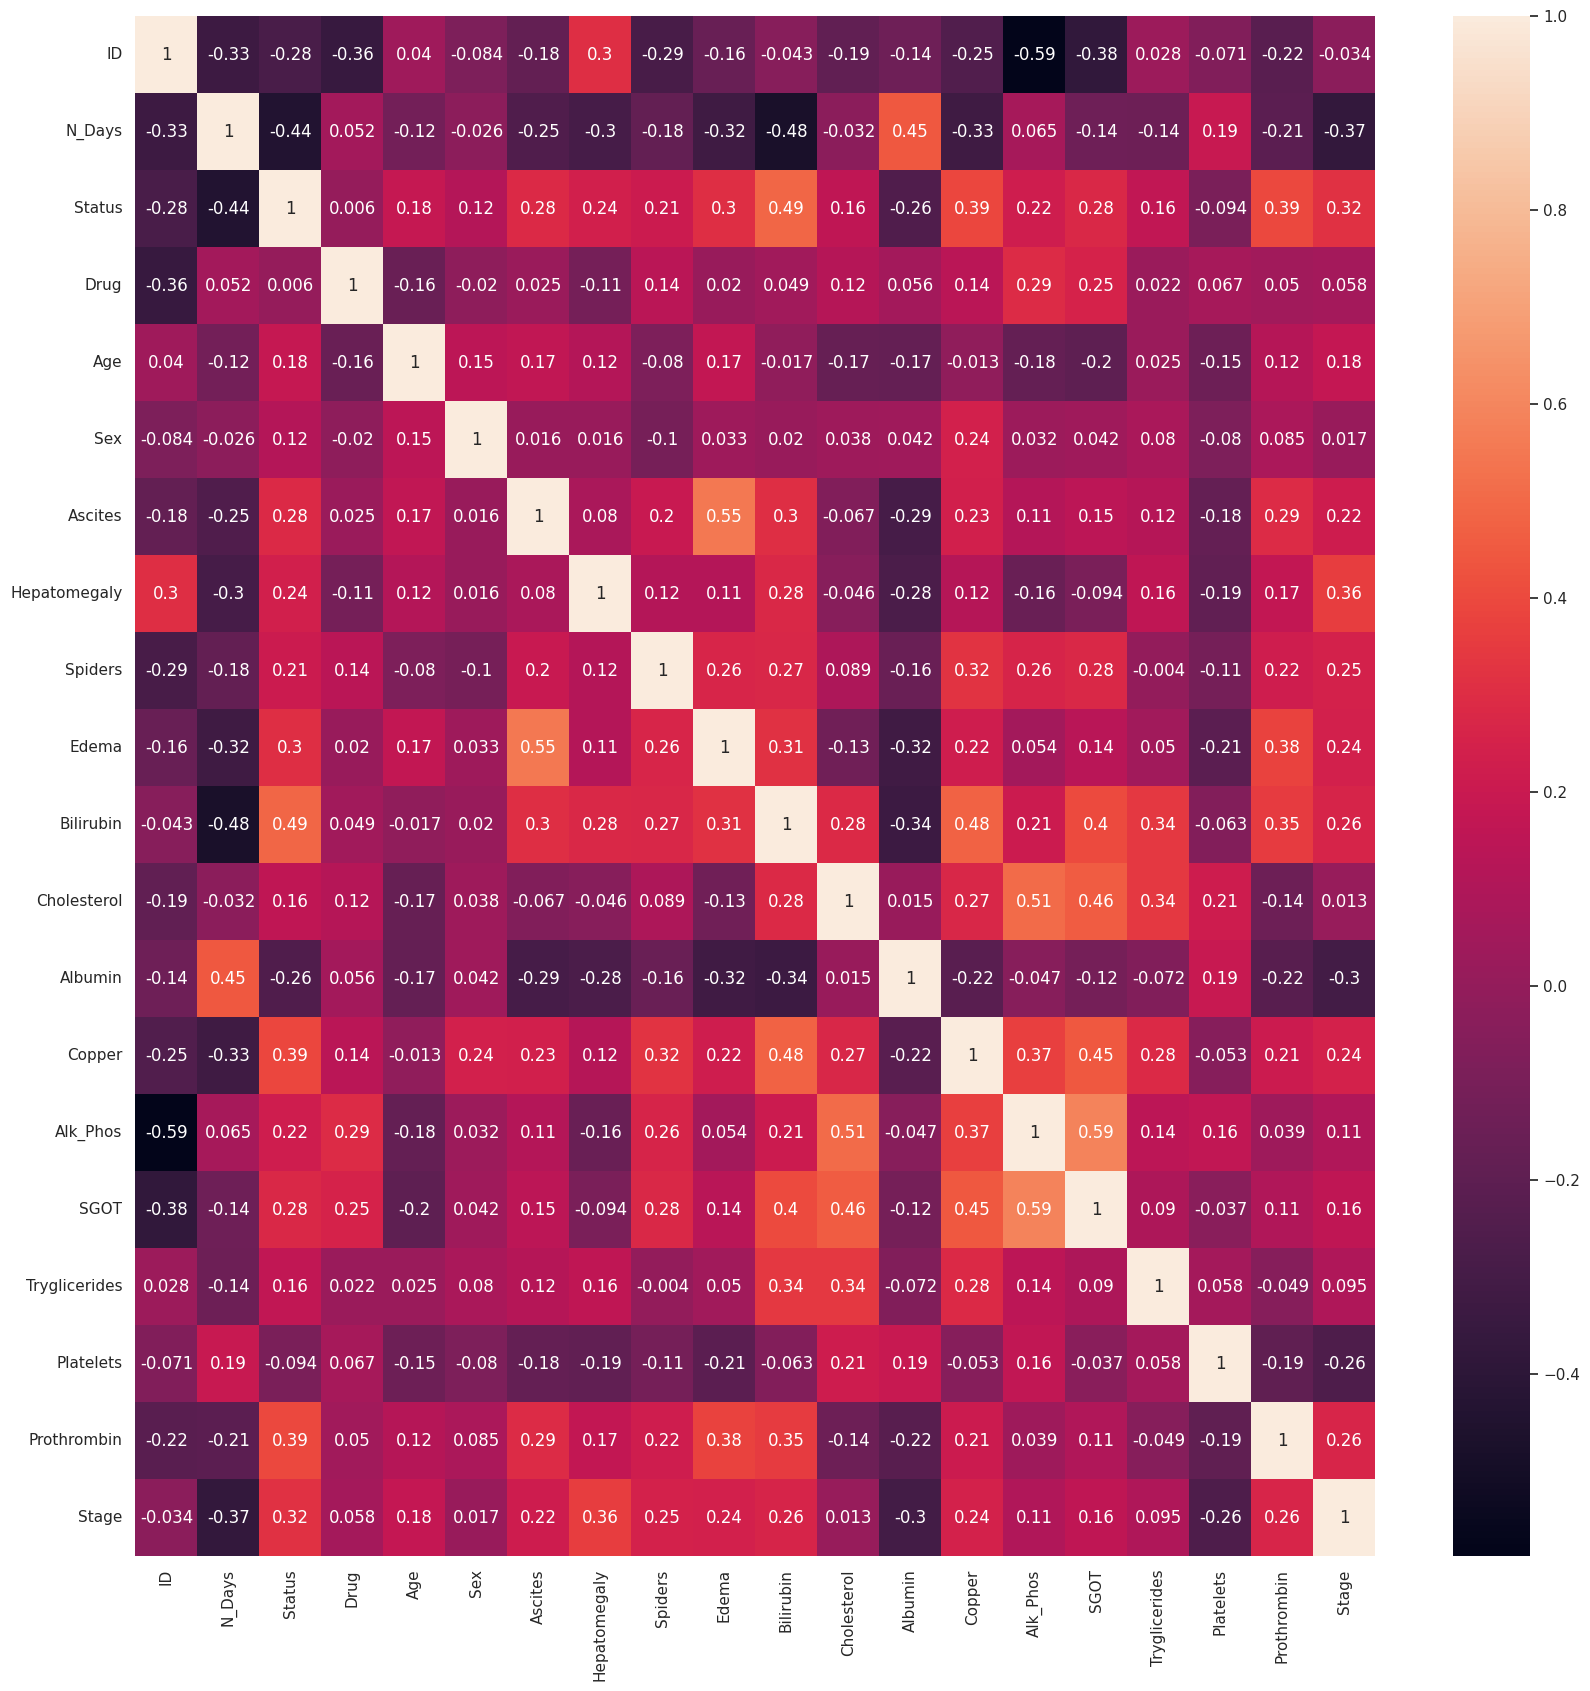

In [14]:
# Finding the correlations between the variables using a heatmap
# High correlations between two independent variables will cause issues
plt.figure(figsize=(20,20))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [15]:
# Seperating the independent and dependent variables and dropping the ID column
x=df.drop(["ID", "Stage"],axis=1)
y=df["Stage"]

In [16]:
# Checking the label imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print(Counter(y))

Counter({2: 161, 3: 144, 1: 92, 0: 21})


In [17]:
# Balancing the imbalanced labels using oversampling to preserve data
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(x, y)

# Checking for label imbalance
print(Counter(y_ros))

Counter({3: 161, 2: 161, 1: 161, 0: 161})


In [18]:
# Scaling using the MinMaxScaler to ensure there is no overfit when fitting data into the model
#.fit_transforms() fits to the data and transforms it.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(X_ros)
y=y_ros

In [19]:
# Applying PCA (Principal Component Analysis) to choose the minimum number of principal components, so there is 95% of the variance.
# This allows for data to be represented as a smaller set of variables, so trends, clusters, outliers, etc. can be seen
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_PCA = pca.fit_transform(x)

# Checking that PCA has reduced to a smaller set of variables that preserve 95% of the variance.
print(x.shape)
print(X_PCA.shape)

(644, 18)
(644, 14)


In [20]:
# Splitting the dataset into the training and testing datasets while preserving 20% of the data for testing and 80% of the data for training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_PCA, y, test_size=0.2, random_state=7)
# Making a second split to create the final training dataset and the validation dataset (the dataset that allows hyperparamter tuning/tuning the number of hidden layers with unbiased data)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.2)

In [21]:
# Importing the XGBClassifier
from xgboost import XGBClassifier

# Creating a  XGBClassifier model
model = XGBClassifier()
model.fit(x_train,y_train)
y_score=model.predict(x_test)

In [22]:
# Predicting cirrhosis stage
Target_Classifcation = model.predict(x_test)
# Creating a multiclass confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, Target_Classifcation))

Confusion Matrix:
[[34  0  0  0]
 [ 0 24  7  1]
 [ 1  6 16  7]
 [ 0  1  7 25]]


In [23]:
# Obtaining an F1 score that is a weighted average of the precision and recall
from sklearn.metrics import f1_score

f1_score(y_test,model.predict(x_test),average='macro')

0.7595802747976661

In [24]:
# Creating a classification report that displays all evaluation matrices and shows accuracy, etc.
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, accuracy_score

print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       0.77      0.75      0.76        32
           2       0.53      0.53      0.53        30
           3       0.76      0.76      0.76        33

    accuracy                           0.77       129
   macro avg       0.76      0.76      0.76       129
weighted avg       0.77      0.77      0.77       129



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4d000c18-526b-4692-95db-8ab2fe406b55' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>